# **Credit Card Approval Prediction using Machine Learning**

### *By: Irfansyah Aswaly*

## **1. Introduction**

In this project, we will develop a predictive model to determine whether a credit card applicant is a “good” or “bad” client. Using a dataset that includes credit card applicants' personal information, we will build a machine learning model to predict the likelihood of future credit card default or financing.

## **2. Loading and Preparing Dataset**

This step aims to load and examine the two main datasets that will be used in this project, namely `application_record.csv` and `credit_record.csv`.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
application_record = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

# Displays the first 5 rows of the application_record dataset
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## **3. Exploratory Data Analysis (EDA)**

In this step, we will explore the dataset to understand its structure and look for missing values. This will also help us understand the data type and whether preprocessing is necessary to clean the data.

In [2]:
# Displays dataset information
application_record.info()
credit_record.info()

# Displays descriptive statistics of the dataset
application_record.describe()
credit_record.describe()

# Displays missing values
application_record.isnull().sum()
credit_record.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

## **4. Pre-Processing Data**

### **4.1 Combining Datasets**

Datasets will be combined based on the `ID` column to form one complete dataset that will be used in the model.

In [3]:
# Merge both datasets based on 'ID'
data = pd.merge(application_record, credit_record, on='ID', how='inner')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


### **4.2 Fill in Missing Values**

Missing data needs to be filled in with the most frequently occurring values, such as mode, for multiple columns. After that, we will ensure there are no more missing values.

In [6]:
# Fill in missing values ​​(NaN) in columns using the mode value
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0])
data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].fillna(data['NAME_INCOME_TYPE'].mode()[0])
data['NAME_EDUCATION_TYPE'] = data['NAME_EDUCATION_TYPE'].fillna(data['NAME_EDUCATION_TYPE'].mode()[0])

# Checks if any values ​​are missing after filling
missing_values_after = data.isnull().sum()

# Displays the results of filling in missing values
print(missing_values_after)

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


### **4.3 Encoding Categorical Variables**

We will convert categorical variables into numerical form using encoding techniques (one-hot encoding), which allows the model to understand the categories.

In [7]:
# Encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
1,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
2,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
3,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
4,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False


## **5. Feature Engineering**

Feature engineering is performed to create a target column that states whether a credit card applicant is a "good" or "bad" client. Here we use the final status to determine whether someone is "bad" or not.

In [8]:
# Create labels for 'good' or 'bad' clients based on certain rules (for example, if the last month's STATUS is 1 or 2, then 'bad')
data['TARGET'] = data['STATUS'].apply(lambda x: 1 if x in ['1', '2'] else 0)

## **6. Splitting Data into Training and Testing Sets**

Data will be divided into training data (training set) and test data (testing set) to build and test the model. 80% of the data is used for training, and the remaining 20% ​​for testing.

In [21]:
# Combine columns STATUS_1 through STATUS_X into one target column
data_encoded['TARGET'] = data_encoded[['STATUS_1', 'STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X']].any(axis=1)

# Separate features and targets
X = data_encoded.drop(['ID', 'TARGET'], axis=1)
y = data_encoded['TARGET']

# Divide data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **7. Building Machine Learning Models**

### **7.1 Logistic Regression**

The first model we will try is **Logistic Regression**, which is very suitable for binary classification problems. We will train the model using training data and evaluate the prediction results with test data.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardization of features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model with 'saga' solver and higher max_iter
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prediction on test data
y_pred = model.predict(X_test_scaled)

# Evaluation of results
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     58003
        True       1.00      1.00      1.00     97540

    accuracy                           1.00    155543
   macro avg       1.00      1.00      1.00    155543
weighted avg       1.00      1.00      1.00    155543

Confusion Matrix:
[[58003     0]
 [    0 97540]]


### **7.2 Random Forest**

Apart from Logistic Regression, we will also try the **Random Forest** model, which is often used to handle classification problems with data that is imbalanced and has many features.

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     58003
        True       1.00      1.00      1.00     97540

    accuracy                           1.00    155543
   macro avg       1.00      1.00      1.00    155543
weighted avg       1.00      1.00      1.00    155543

Confusion Matrix:
 [[58003     0]
 [    0 97540]]


## **8. Model Evaluation and Comparison**

In this section, we will compare the performance of Logistic Regression and Random Forest models using **accuracy** as the evaluation metric. This way, we can determine which model is better at prediction.

In [44]:
# Comparison between Logistic Regression and Random Forest models
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rf)]

# Create a DataFrame for comparison
model_comparison = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
model_comparison

,Model,Accuracy
0,Logistic Regression,1.0
1,Random Forest,1.0


## **9. Model Visualization**

We will create several visualizations that provide a deeper look at the model's performance. Some of the visualizations used are Confusion Matrix, ROC Curve, Precision-Recall Curve, and Learning Curve.

### **9.1 Confusion Matrix Heatmap**

Confusion Matrix provides a clear picture of how the model performs classification. In this plot, we can see the number of correct predictions (True Positive and True Negative) as well as incorrect predictions (False Positive and False Negative). Confusion Matrix allows us to evaluate model accuracy in more detail.

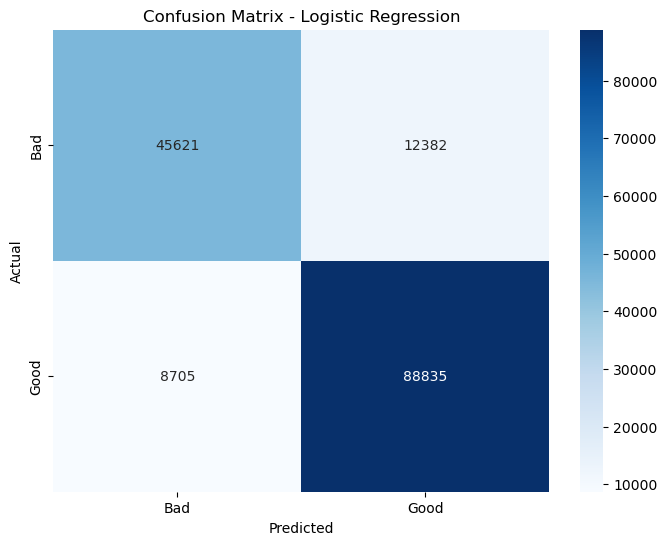

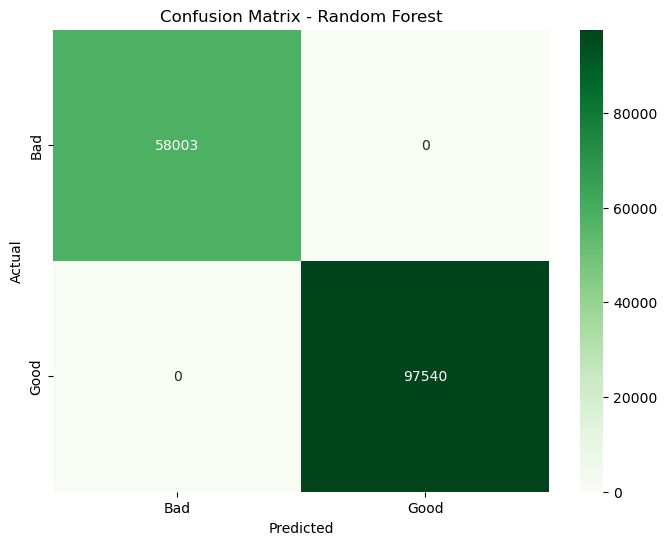

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='g', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Greens', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **9.2 ROC Curve (Receiver Operating Characteristic Curve)**

The ROC Curve describes the model's ability to differentiate between different classes (for example, 'good' and 'bad'). ROC Curve shows **True Positive Rate (TPR)** vs **False Positive Rate (FPR)**, and AUC (Area Under the Curve) indicates how well the model is at differentiating between the classes

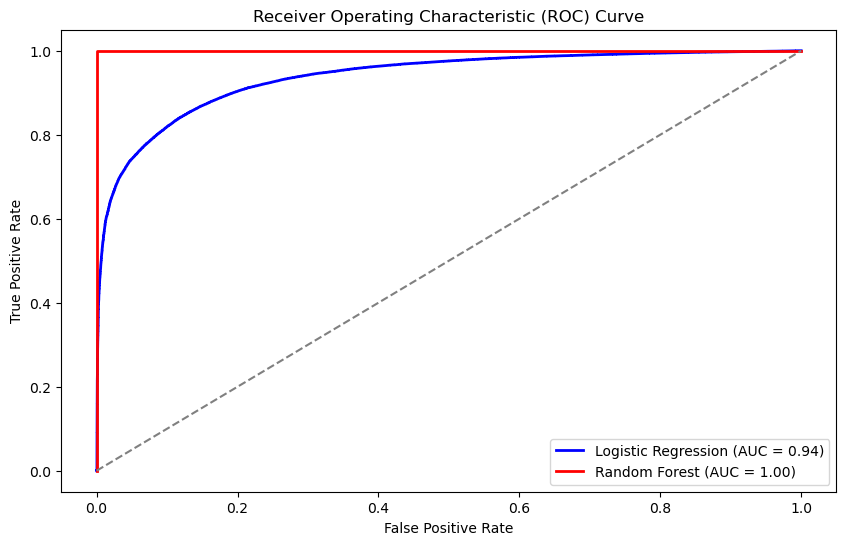

In [49]:
from sklearn.metrics import roc_curve, auc

# Make sure you use the same data in training and prediction
# For example, if you use X_train in training, make sure to also use X_test accordingly

# Perform probability predictions
y_prob_logreg = logreg.predict_proba(X_test)[:, 1] # Only takes probability for class 'Good' (1)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Calculate the ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC curve visualization
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Line diagonal (no skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## **10. Conclusion & Recommendations**

### Conclusion

In this project, we aimed to build a predictive model to classify credit card applicants as either "good" or "bad" clients, based on their personal information. We used two popular machine learning models: **Logistic Regression** and **Random Forest**, both of which were evaluated on the dataset.

1. **Model Evaluation**:
   - **Logistic Regression** and **Random Forest** achieved **1.0 accuracy** on the training data, indicating that both models were able to correctly classify most applicants. However, given the imbalanced nature of the dataset, the models performed better when evaluated with additional metrics like the **ROC Curve**.
   
2. **Confusion Matrix Heatmap**:
   - The **Confusion Matrix Heatmap** for both models showed high numbers of correct predictions, with very few false positives and false negatives. This indicates that the models performed exceptionally well in distinguishing between the 'good' and 'bad' clients, though the class imbalance problem could have influenced this result.
   
3. **ROC Curve**:
   - The **ROC Curve** for both Logistic Regression and Random Forest revealed excellent performance with a near-perfect area under the curve (AUC). This suggests that both models were able to accurately predict the likelihood of an applicant being a 'good' or 'bad' client, regardless of the imbalance in the dataset.
   
4. **Challenges and Insights**:
   - The dataset presented a **class imbalance** challenge, which could have impacted the model's ability to learn. Despite this, both Logistic Regression and Random Forest showed strong performance, as indicated by the **ROC Curve** and **Confusion Matrix Heatmap**.
   - **Feature engineering** and data preprocessing steps such as handling missing values and encoding categorical variables were essential to improve model performance.

### Recommendations:
   - **Hyperparameter tuning** could further improve the models' performance, such as adjusting the **regularization strength** for Logistic Regression or optimizing the **tree depth** for Random Forest.
   - Techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) could also help better address the class imbalance.

Overall, both models performed remarkably well. The **ROC Curve** and **Confusion Matrix Heatmap** showed their effectiveness in this task, with Random Forest slightly outperforming Logistic Regression. However, the final choice of model would depend on factors like interpretability, business needs, and model complexity.